# Vježbe 2 - dio 1
 - Analiza domaće zadaće
 - Polinomna regresija
 - Nove loss funkcije

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

np.random.seed(123)
plt.rcParams["figure.figsize"] = (10, 10)

## Zadatak 1 (5)
Zadana je model-funkcija
$$
h_{\Theta}(x) = \theta_0 + \sum_{i=1}^n\theta_ix_i.
$$
Dokažite da je funkcija
$$
J(\Theta) = \frac{1}{2m}\sum\limits_{i=1}^{m}(h_{\Theta}(x^{(i)})-y^{(i)})^2
$$
konveksna.

(**Hint**: kakvo svojstvo ima Hesijan konveksne funkcije?)

---

## Zadatak 2 (10)
Izračunajte gradijent funkcije 
$$J(\Theta) = \frac{1}{2m}\sum\limits_{i=1}^{m}(h_{\Theta}(x^{(i)})-y^{(i)})^2$$
za istu model funkciju $h_{\Theta}$ iz zadatka 1.

---

## Zadatak 3 (15)
Zadani su ulazni podaci $X\in \mathbb{R}^{m \times n}$ i pripadne izlazne vrijednosti $y\in\mathbb{R}^{m}$. Na ovim podacima možemo provesti proces učenja modela linearne regresije.

Učenje se svodi na minimizaciju funkcije $J(\theta) = \frac{1}{2m}\sum\limits_{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)})^2$, a do rješenja dolazimo primjenom gradijentne metode.

Implementirajte gradijentnu metodu za učenje modela linearne regresije u općenitom slučaju kada su ulazni podaci dimenzije $X\in \mathbb{R}^{m\times n}$.<br>

Dodajte sljedeću mogućnost svojoj implementaciji gradijentne metode: crtanje grafa ovisnosti funkcije troška $J(\theta)$ o iteracijama. (U svakoj iteraciji spremite vrijednost funkcije troška)

In [6]:
def h(x, theta):
    return np.dot(theta, x) #dobivamo broj radi se o skalarnom produktu $\theta_0 + \theta_1+x_1 +\theta_2+x_2 + ...$

def h_vectorised(X, theta):
    return (X @ theta)

def J(X, y, theta):
    m = X.shape[0]
    return (0.5 / m) * np.sum(np.square(h_vectorised(X, theta) - y))

def gradient_without_ones(X, y, theta):
    """
    Pretpostavljamo da je X dimenzije m x n
    Bez jedinica u prvom stupcu
    """
    m, n = X.shape
    grad = np.zeros(n + 1)
    for j in range(n + 1):
        for i in range(m):
            if j == 0:
                grad[j] += (h(X[i], theta) - y[i])
            else:
                grad[j] += (h(X[i], theta) - y[i]) * X[i][j]
        grad[j] *= (1.0 / m)
    return grad
    
def gradient(X, y, theta):
    """
    Pretpostavljamo da je X dimenzije m x (n+1)
    tj. X je matrica dizajna
    """
    m, n = X.shape
    return (1.0 / m) * ((h_vectorised(X, theta) - y).T @ X).reshape(-1, 1)

def gradient_method(X, y, learning_rate=0.1, iterations=500):
    print(f'Starting gradient descent with {iterations} iterations and learning rate {learning_rate}')
    theta = np.zeros(X.shape[1]).reshape(-1, 1)
    loss = np.empty(iterations)
    for it in range(iterations):
        loss[it] = J(X, y, theta)
        grad = gradient(X, y, theta)
        theta = np.subtract(theta, learning_rate * grad)
        if it % (iterations // 10) == (iterations // 10 - 1):
            print(f'Iteration {it + 1}\ngrad = {grad.squeeze()}\ntheta = {theta.squeeze()}\nloss = {loss[it]}')
    return theta, loss

def draw(J_values):
    iterations = J_values.shape[0]
    plt.plot(np.arange(iterations), J_values)

## Zadatak 4 (15)
U datoteci house.csv se nalaze podaci o nekretninama, koji sadrže različite karakteristike nekretnina poput površine ili broja soba te cijenu. Cilj narednih zadataka će biti uspostaviti linearnu regresiju između različitih karakteristika kuće u svrhu predviđanja cijene nekretnine. 

Kao ulaznu varijablu uzmite sqft_living, a kao izlaznu varijablu price. 

1. Učitajte podatke koji su vam dani u datoteci *house.csv*. 

2. Konstruirajte *numpy.array*-e koji sadrže matricu dizajna $X\in \mathbb{R}^{m\times (n+1)}$ i vektor izlaznih podataka $y \in \mathbb{R}^{m}$ (ovdje je $n=1$). 

3. Primjenom proizvoljne metode razdvojite skup podataka na skup za treniranje i skup za testiranje modela. (npr. [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) kao na vježbama). Na taj način ćete dobiti *numpy.array*-e $X_{train}$, $y_{train}$, $X_{test}$ te $y_{test}$. Neka se u skupu za treniranje nalazi $80\%$ podataka.

4. Skalirajte podatke koristeći metodu objašnjenu na [linku](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler). Scaler trebate fitati na skupu za treniranje i isti Scaler iskoristiti za skaliranje testnog skupa.

5. Koristeći proizvoljnu biblioteku vizualizirajte odnos varijable ulaznih i izlaznih podataka. 

6. Pokrenite gradijentnu metodu koju ste implementirali u prethodnom zadatku i pomoću nje odredite parametre $\theta_0$ i $\theta_1$. (Stopu učenja i broj iteracija odredite sami)

7. Pravac određen izračunatim  parametrima $\theta_0$ i $\theta_1$ prikažite na grafu iz podzadatka 5.

8. Nacrtajte  graf promjene funkcije troška $J(\Theta)$ kroz iteracije.

9. Na podacima za testiranje provedite testirajte svoj model tako da izračunate pogrešku kao što smo pokazali na vježbama. Ispišite vrijednost pogreške.

11. Za podatke $X_{train}$ i $y_{train}$ odredite opet parametre $\theta_0$ i $\theta_1$, ali koristeći [gotovu implementaciju](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) iz scikit-learn biblioteke. (Pazite na dimenzije)

12. Na učitanim podacima za testiranje provedite testiranje ovog modela kao što smo pokazali na vježbama. Ispišite vrijednost pogreške.

13. Razlikuju li se model koji ste dobili koristeći vašu implementaciju gradijentne metode i model koji ste dobili ste dobili koristeći gotovu implementaciju iz *scikit-learn* biblioteke? 

14. Za podatke $X$ i $Y$ učitane iz datoteke *house_train.csv* odredite opet parametre $\theta_0, \theta_1$, ali koristeći sustav normalnih jednadžbi. 

In [7]:
# Podzadatak 1
df = pd.read_csv('./house.csv')
# df = df.dropna()
df

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,12697,203101065,20140528T000000,420000.0,3,1.75,1820,22320,1.0,0,...,7,1250,570,1977,0,98053,47.6441,-121.960,2030,22320
1,6533,8645530010,20140515T000000,225000.0,3,2.00,1400,7384,1.0,0,...,7,1150,250,1979,0,98058,47.4655,-122.174,1820,7992
2,18268,2422000067,20150427T000000,230000.0,3,2.25,1830,11331,1.0,0,...,7,1250,580,1965,0,98001,47.2899,-122.287,2240,16433
3,33,7589200193,20141110T000000,535000.0,3,1.00,1090,3000,1.5,0,...,8,1090,0,1929,0,98117,47.6889,-122.375,1570,5080
4,12229,1473060030,20140709T000000,525000.0,4,2.50,3670,9958,2.0,0,...,10,3670,0,2005,0,98058,47.4617,-122.159,3300,10679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,21604,9834201367,20150126T000000,429000.0,3,2.00,1490,1126,3.0,0,...,8,1490,0,2014,0,98144,47.5699,-122.288,1400,1230
21609,21606,7936000429,20150326T000000,1007500.0,4,3.50,3510,7200,2.0,0,...,9,2600,910,2009,0,98136,47.5537,-122.398,2050,6200
21610,21607,2997800021,20150219T000000,475000.0,3,2.50,1310,1294,2.0,0,...,8,1180,130,2008,0,98116,47.5773,-122.409,1330,1265
21611,21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509


In [8]:
# Podzadaci 2, 3, 4
X = df['sqft_living']
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train = X_train.to_numpy().reshape(-1, 1)
X_test = X_test.to_numpy().reshape(-1, 1)
y_train = y_train.to_numpy().reshape(-1, 1)
y_test = y_test.to_numpy().reshape(-1, 1)

scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

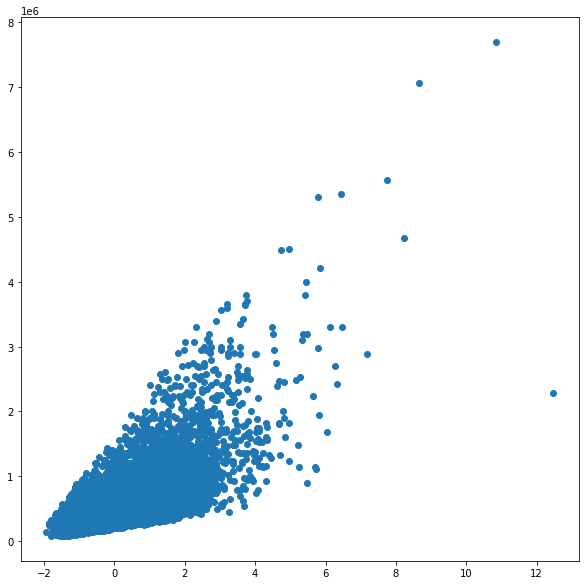

In [9]:
# Podzadatak 5
plt.scatter(X_train, y_train)

In [10]:
# Podzadatak 6
m = X_train.shape[0]
X_train_with_ones = np.concatenate((np.ones((m, 1)), X_train), axis=1)
theta, loss = gradient_method(X_train_with_ones, y_train, iterations=500)

Starting gradient descent with 500 iterations and learning rate 0.1
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
Iteration 50
grad = [-3091.60785428 -1483.68346831]
theta = [537102.7743308  257759.24522744]
loss = 34392140128.03154
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
Iteration 100
grad = [-15.93345191  -7.64657107]
theta = [539870.88129293 259087.67843495]
loss = 34386260606.32463
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
1

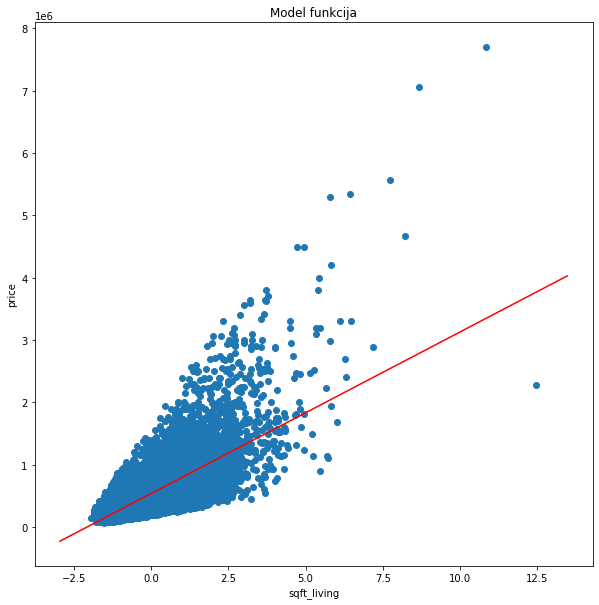

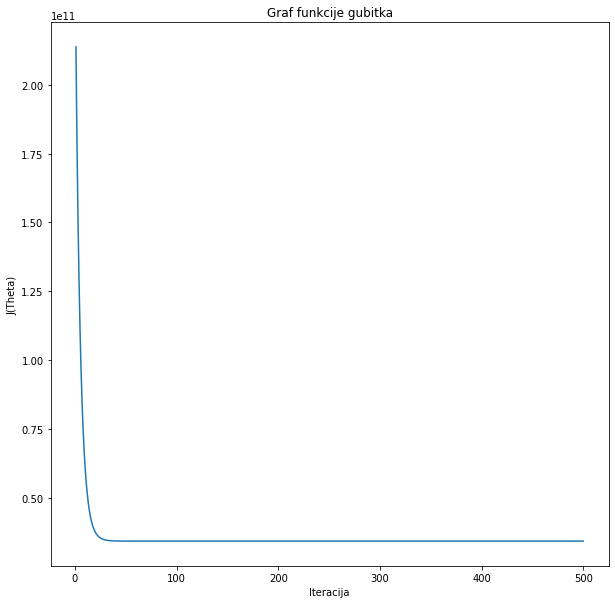

In [7]:
# Podzadatak 7 i 8

plt.scatter(X_train, y_train)
x = np.linspace(np.min(X_train) - 1, np.max(X_train) + 1, 10000)
y = theta[0] + x * theta[1]
plt.plot(x, y, color='r')
plt.title('Model funkcija')
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.show()

plt.plot(np.arange(1, loss.shape[0] + 1), loss)
plt.title('Graf funkcije gubitka')
plt.xlabel('Iteracija')
plt.ylabel('J(Theta)')
plt.show()

In [8]:
# Podzadatak 9
m = X_test.shape[0]
X_test_with_ones = np.concatenate((np.ones((m, 1)), X_test), axis=1)
predictions = h_vectorised(X_test_with_ones, theta)

loss = 0
for i, prediction in enumerate(predictions):
    loss += (prediction -  y_test[i])**2
print(f'Prosječni loss na testnom skupu iznosi {loss[0] / (2 * m)}')

Prosječni loss na testnom skupu iznosi 33337187875.301006


In [9]:
# Podzadatak 10
lr = LinearRegression(fit_intercept=True)
lr.fit(X_train, y_train)
lr.coef_, lr.intercept_

(array([[259094.56034892]]), array([539885.22139965]))

In [10]:
lr.score(X_test, y_test)

0.48818460688341214

In [11]:
# Podzadatak 11
loss = 0
for i, prediction in enumerate(lr.predict(X_test)):
    loss += (prediction -  y_test[i])**2
print(f'Prosječni loss na testnom skupu iznosi {loss[0] / (2 * m)}')

Prosječni loss na testnom skupu iznosi 33337187875.301


In [12]:
# Podzadatak 12
# Modeli daju jednak rezultat

In [13]:
# Podzadatak 13
m = X_train.shape[0]
X_neq = np.concatenate((np.ones((m, 1)), X_train), axis=1)
theta_normal_eq = np.linalg.inv(X_neq.T @ X_neq).dot(X_neq.T).dot(y_train)
theta_normal_eq.squeeze()

array([539885.22139965, 259094.56034892])

## Zadatak 5 (15)
___
U ovom zadatku ulazni podaci će biti višestruki. Izlazna varijabla je i dalje price. 
1. Odaberite barem 3 varijable koje će vam predstavljati ulazne podatke modela. Reprezentirajte ih kao *numpy.array*.

2. Vizualizirajte veze između odabranih varijabli. Ukratko argumentirajte zašto je vaš izbor dobar (ili loš) za izgradnju modela linearne regresije.

3. Izračunajte parametre $\theta_0, \theta_1, \cdots, \theta_n$ koristeći implementaciju gradijentne metode iz trećeg zadatka. ($n$ je broj varijabli koje ste odabrali).

4. Testirajte kvalitetu svojeg modela na podacima za testiranje $X_{test}$ i $y_{test}$. Ispišite vrijednost pogreške na skupu za testiranje.

In [11]:
# Podzadatak 1
# Biramo varijable sqft_living, bathrooms i bedrooms
X = df[['sqft_living', 'bathrooms', 'bedrooms']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy().reshape(-1, 1)
y_test = y_test.to_numpy().reshape(-1, 1)

Text(0, 0.5, 'price')

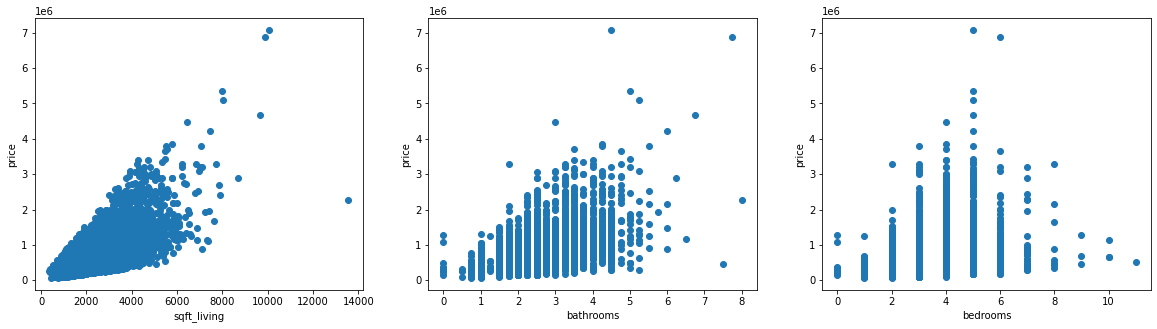

In [12]:
# Podzadatak 2
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].scatter(X_train[:, 0], y_train)
axs[0].set_xlabel('sqft_living')
axs[0].set_ylabel('price')

axs[1].scatter(X_train[:, 1], y_train)
axs[1].set_xlabel('bathrooms')
axs[1].set_ylabel('price')

axs[2].scatter(X_train[:, 2], y_train)
axs[2].set_xlabel('bedrooms')
axs[2].set_ylabel('price')

In [16]:
# Skaliranje podataka
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
# Podzadatak 3
m = X_train.shape[0]
X_train_with_ones = np.concatenate((np.ones((m, 1)), X_train), axis=1)
theta, loss = gradient_method(X_train_with_ones, y_train, learning_rate=0.1, iterations=500)

Starting gradient descent with 500 iterations and learning rate 0.1
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
Iteration 50
grad = [4.86728326e+285 1.20850715e+289 1.15352114e+286 1.75320690e+286]
theta = [-4.86727384e+284 -1.20850481e+288 -1.15351890e+285 -1.75320350e+285]
loss = inf
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
Iteration 100
grad = [nan nan nan nan]
theta = [nan nan nan nan]
loss = nan
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
17290
172

C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_6060/2064933193.py:10: RuntimeWarning: overflow encountered in square
  return (0.5 / m) * np.sum(np.square(h_vectorised(X, theta) - y))
C:\Users\Administrator\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_6060/2064933193.py:34: RuntimeWarning: overflow encountered in matmul
  return (1.0 / m) * ((h_vectorised(X, theta) - y).T @ X).reshape(-1, 1)
C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_6060/2064933193.py:34: RuntimeWarning: invalid value encountered in matmul
  return (1.0 / m) * ((h_vectorised(X, theta) - y).T @ X).reshape(-1, 1)
C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_6060/2064933193.py:43: RuntimeWarning: invalid value encountered in subtract
  theta = np.subtract(theta, learning_rate * grad)


In [18]:
# Podzadatak 4
m = X_test.shape[0]
X_test_with_ones = np.concatenate((np.ones((m, 1)), X_test), axis=1)
predictions = h_vectorised(X_test_with_ones, theta)

loss = 0
for i, prediction in enumerate(predictions):
    loss += (prediction -  y_test[i])**2
print(f'Prosječni loss na testnom skupu iznosi {loss[0] / (2 * m)}')

Prosječni loss na testnom skupu iznosi 34969131330.38527


## Polinomna regresija
Skup iz datoteke poly_data.csv ćemo modelirati polinomom stupnja većeg od 1.

In [19]:
data_path = './poly_data.csv'
df = pd.read_csv(data_path)
df

,x,y
0,5.180930,108.178571
1,2.813873,25.310284
2,3.629115,29.099405
3,8.439167,550.499645
4,2.320361,1.945666
...,...,...
1995,10.077961,309.522407
1996,3.168160,403.415668
1997,2.415014,824.799528
1998,4.359304,546.270698


Umjesto definiranja kubične model funkcije
$$
h_{\textrm{cubic}}(x) = \theta_0 + \theta_1x + \theta_2x^2 + \theta_3x^3,
$$
definiramo linearnu model funkciju 
$$
h_{\textrm{linear}}(x) = \theta_0 + \theta_1x_1 + \theta_2x_2 + \theta_3x_3,
$$
gdje je $x_1 = x$, $x_2 = x^2$, $x_3 = x^3$.

U modelu polinomijalne regresije stupnja $n$, matrica dizajna je oblika
$$
\begin{bmatrix}
1 & x^{(1)} & x^{(1)^2} & \dots & x^{(1)^n} \\
1 & x^{(2)} & x^{(2)^2} & \dots & x^{(2)^n} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x^{(m)} & x^{(m)^2} & \dots & x^{(m)^n}
\end{bmatrix},
$$
što je upravo Vandermondeova matrica te je regularna ako su svi $x^{(i)}$ međusobno različiti.

In [20]:
def cubic_regression_transform(X):
    """X je numpy.array oblika (m,)
    """
    m = X.shape[0]
    X_transformed = np.empty((m, 3))
    X_transformed[:, 0] = X
    X_transformed[:, 1] = np.power(X, 2)
    X_transformed[:, 2] = np.power(X, 3)
    return X_transformed

In [21]:
X = df['x']
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train_transformed = cubic_regression_transform(X_train.to_numpy())
X_test_transformed = cubic_regression_transform(X_test.to_numpy())
y_train = y_train.to_numpy().reshape(-1, 1)
y_test = y_test.to_numpy().reshape(-1, 1)

# Skaliranje podataka
scaler = preprocessing.StandardScaler()
scaler.fit(X_train_transformed)
X_train_transformed = scaler.transform(X_train_transformed)
X_test_transformed = scaler.transform(X_test_transformed)

### Treniranje i "evaluacija" modela

In [22]:
m = X_train.shape[0]
X_train_with_ones = np.concatenate((np.ones((m, 1)), X_train_transformed), axis=1)
theta, loss = gradient_method(X_train_with_ones, y_train, learning_rate=0.1, iterations=100000)

Starting gradient descent with 100000 iterations and learning rate 0.1
Iteration 10000
grad = [-1.24025235e-13 -4.82045242e-04  1.20174106e-03 -7.44417400e-04]
theta = [224.31533053 -29.60542357  85.95558469 163.59424132]
loss = 7908.077813733723
Iteration 20000
grad = [-1.23030475e-13 -1.50882812e-04  3.76151560e-04 -2.33006741e-04]
theta = [224.31533053 -29.32033243  85.24485114 164.03450457]
loss = 7908.076947519454
Iteration 30000
grad = [-1.23385746e-13 -4.72271501e-05  1.17737507e-04 -7.29323914e-05]
theta = [224.31533053 -29.23109734  85.02238763 164.17230939]
loss = 7908.076862654325
Iteration 40000
grad = [-1.25091049e-13 -1.47823577e-05  3.68524873e-05 -2.28282397e-05]
theta = [224.31533053 -29.20316626  84.95275533 164.21544305]
loss = 7908.07685433988
Iteration 50000
grad = [-1.21680443e-13 -4.62695926e-06  1.15350312e-05 -7.14536455e-06]
theta = [224.31533053 -29.19442368  84.93096003 164.22894413]
loss = 7908.0768535252955
Iteration 60000
grad = [-1.23741017e-13 -1.448263

(1000, 4)


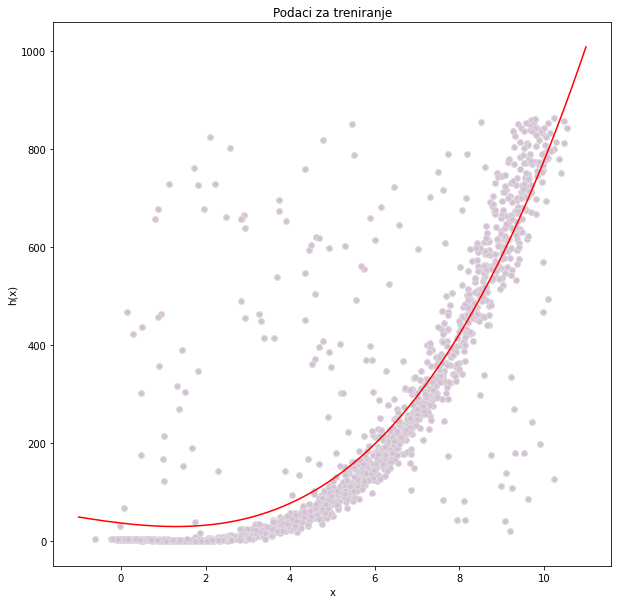

In [23]:
plt.scatter(X_train, y_train, color='thistle', edgecolors='gainsboro')
x = np.linspace(-1.0, 11.0, 1000)
x_tr = scaler.transform(cubic_regression_transform(x))
x_tr = np.concatenate((np.ones((x_tr.shape[0], 1)), x_tr), axis=1)
print(x_tr.shape)
plt.plot(x, h_vectorised(x_tr, theta), color='red')
plt.title('Podaci za treniranje')
plt.xlabel('x')
plt.ylabel('h(x)')
plt.show()

(1000, 4)


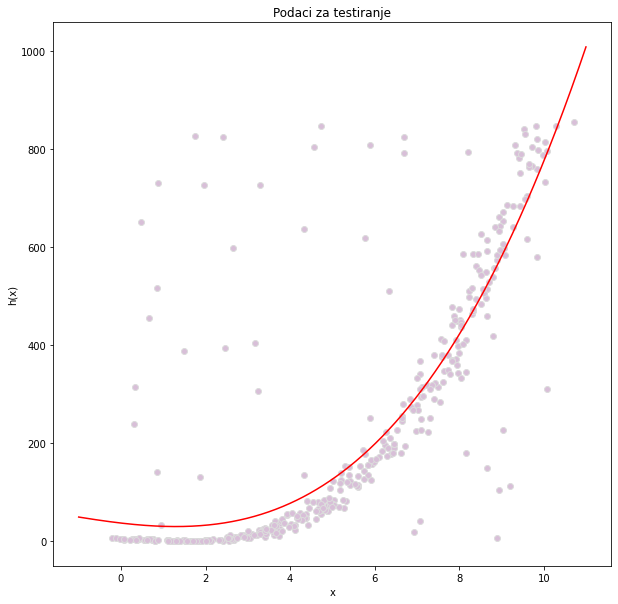

In [24]:
plt.scatter(X_test, y_test, color='thistle', edgecolors='gainsboro')
x = np.linspace(-1.0, 11.0, 1000)
x_tr = scaler.transform(cubic_regression_transform(x))
x_tr = np.concatenate((np.ones((x_tr.shape[0], 1)), x_tr), axis=1)
print(x_tr.shape)
plt.plot(x, h_vectorised(x_tr, theta), color='red')
plt.title('Podaci za testiranje')
plt.xlabel('x')
plt.ylabel('h(x)')
plt.show()

Hoćemo li dobiti iste rezultate ako koristimo scikit-learn regresiju?

In [25]:
lr = LinearRegression().fit(X_train_transformed, y_train)
lr.coef_, lr.intercept_

(array([[-29.19044043,  84.92102975, 164.23509543]]), array([224.31533053]))

In [26]:
lr.score(X_test_transformed, y_test)

0.6523234392826405

## Huber regresija

In [27]:
from sklearn.linear_model import HuberRegressor
from sklearn.datasets import make_regression
from numpy.random import default_rng
rng = default_rng()

Sa standardnom (*mean squared error*) funkcijom cilja kvaliteta modela ovisi o stršećim vrijednostima.

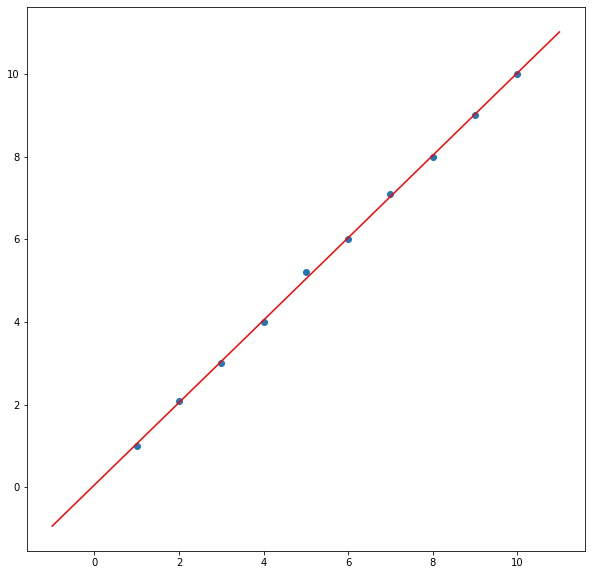

In [28]:
X = np.array([1,2,3,4,5,6,7,8,9,10]).reshape(-1, 1)
y = np.array([1, 2.1, 3, 4, 5.2, 6, 7.1, 8, 9, 10]).reshape(-1, 1)
lr = LinearRegression().fit(X, y)
plt.scatter(X, y)

x = np.linspace(-1, 11, 100)
plt.plot(x, (lr.intercept_ + x * lr.coef_).reshape(-1), color='red')
plt.show()

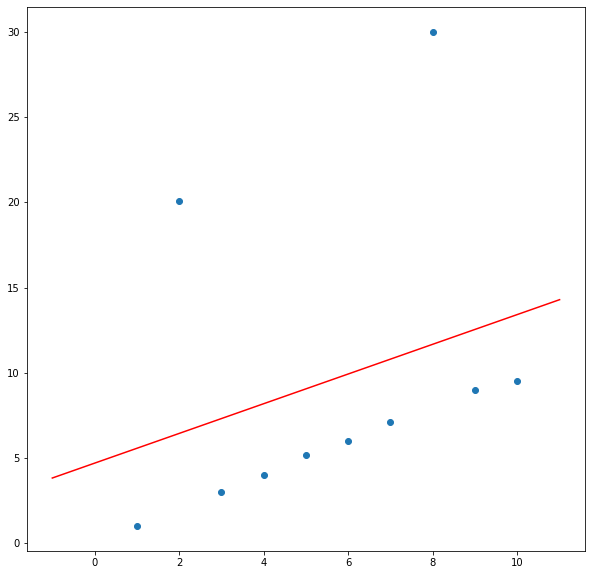

In [29]:
X = np.array([1,2,3,4,5,6,7,8,9,10]).reshape(-1, 1)
y = np.array([1, 20.1, 3, 4, 5.2, 6, 7.1, 30, 9, 9.5]).reshape(-1, 1)
lr = LinearRegression().fit(X, y)
plt.scatter(X, y)

x = np.linspace(-1, 11, 100)
plt.plot(x, (lr.intercept_ + x * lr.coef_).reshape(-1), color='red')
plt.show()

Kako bismo izbjegli ovaj problem, koristimo funkciju gubitka *Huber loss* koja je robusnija na sršeće vrijednosti u odnosu MSE loss. 
Funkcija se definira na sljedeći način: 
$$ 
L_{\delta}(a) = \begin{cases}
                            \frac{1}{2}a^2, \;za\; |a| \leq \delta \\
                            \delta \cdot |a| - \frac{1}{2}\delta ^2, \; inace
                            \end{cases}
$$
U slučaju regresije, umjesto varijable $a$ uvrštavamo rezidual $y - h(x)$.

In [30]:
def huber_loss(a, delta=1):
    if abs(a) <= delta:
        return 0.5 * a ** 2
    else: 
        return delta * abs(a) - 0.5 * (delta ** 2)
    
def f(x):
    return x ** 2

def g(x, delta=1):
    return delta * abs(x) - 0.5 * (delta ** 2)

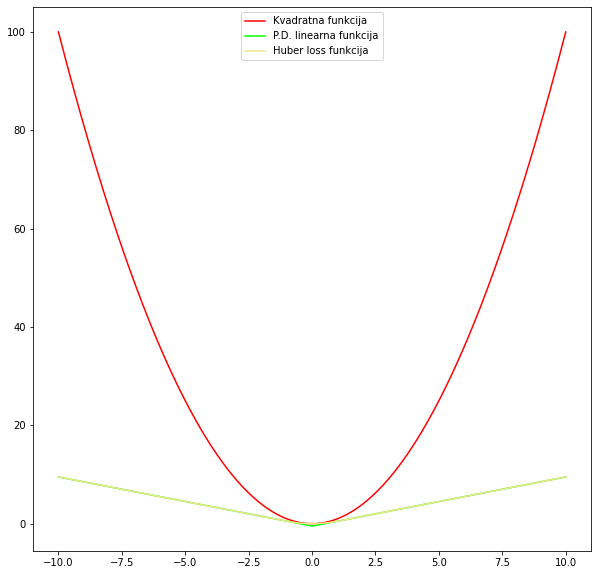

In [31]:
x = np.linspace(-10, 10, 1000)

plt.plot(x, f(x), color='red')
plt.plot(x, g(x), color='lime')
plt.plot(x, [huber_loss(_) for _ in x], color='khaki')
plt.legend(['Kvadratna funkcija', 'P.D. linearna funkcija', 'Huber loss funkcija'])
plt.show()

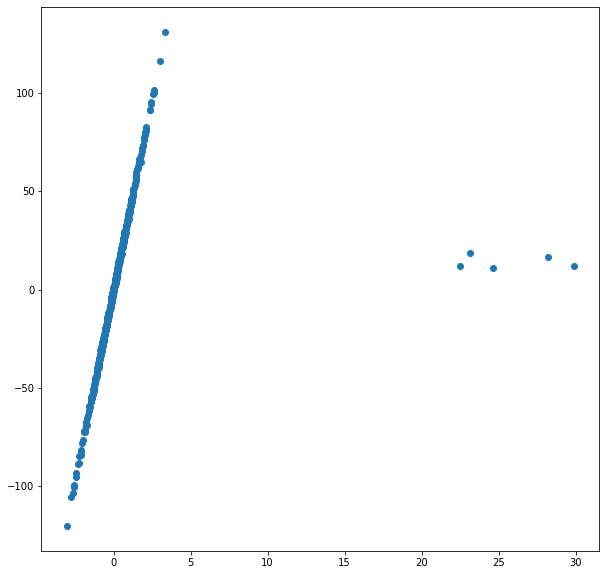

In [32]:
X, y = make_regression(n_samples=500, n_features=1, noise=1)

X[:5] = rng.uniform(20, 30, (5, 1))
y[:5] = rng.uniform(10, 20, 5)

plt.scatter(X, y)
plt.show()

In [33]:
lr = LinearRegression().fit(X, y)
hr = HuberRegressor().fit(X, y)

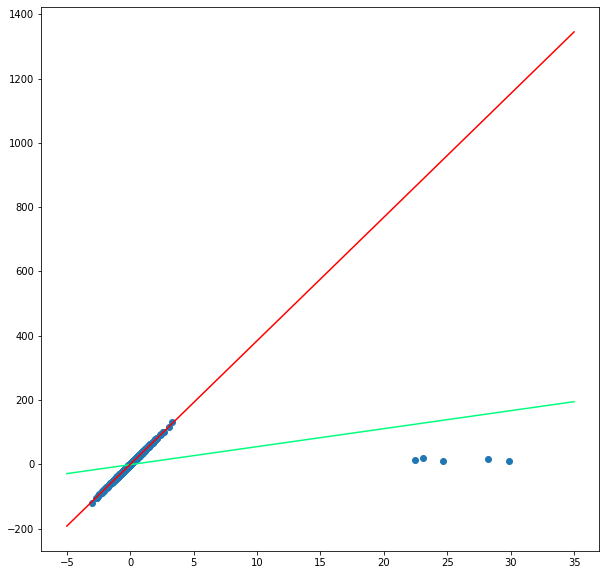

In [34]:
x = np.linspace(-5, 35, 1000)

plt.scatter(X, y)
plt.plot(x, lr.predict(x.reshape(-1, 1)), color='springgreen')
plt.plot(x, hr.predict(x.reshape(-1, 1)), color='red')

plt.show()